In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import csv

In [4]:
# Load transactions data from the csv file
# Store into list of strings called groceries

transactions=[]
with open('/content/Market_Basket_Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        transactions.append(row)

In [5]:
# Print the first transaction
print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [6]:
print(len(transactions))

7501


Generating rules with itertools
An association rule consists of an antecedent and a consequent. A basic rule with a single antecedent and consequent can be expressed as "If A, then B." More complex rules may include multiple antecedents, such as "If A and B, then C," or multiple consequents, like "If A, then B and C."

Explore the transaction data
Before proceeding, it's important to analyze and understand the structure of the transaction data. The dataset consists of a large number of transactions, each recording the items purchased from a supermarket. Each row represents a single transaction. In total, there are 120 unique items across all transactions, as listed below.

In [7]:
from itertools import permutations

# Identify the unique items
flattened = [item for transaction in transactions for item in transaction]
items= list(set(flattened))
#print(items)

In [8]:
# Number of items
# Items from all the transactions
print(f'There are {len(items)} items.\n\nThey are {", ".join(items)}')

There are 120 items.

They are fromage blanc, cereals, shallot, sandwich, chocolate bread, cream, hand protein bar, french fries, hot dogs, protein bar, fresh bread, pickles, black tea, almonds, ketchup, pasta, salt, grated cheese, soup, cottage cheese, meatballs, carrots, magazines, strawberries, cookies, toothpaste,  asparagus, eggplant, cake, corn, energy drink, babies food, frozen smoothie, strong cheese, dessert wine, mayonnaise, honey, chili, fresh tuna, body spray, salad, milk, whole wheat pasta, mashed potato, olive oil, extra dark chocolate, champagne, whole wheat rice, cauliflower, mineral water, herb & pepper, burgers, clothes accessories, pepper, avocado, pancakes, ground beef, oil, chicken, mint, light mayo, salmon, gums, low fat yogurt, cider, oatmeal, spinach, eggs, energy bar, cooking oil, bug spray, shrimp, napkins, burger sauce, pet food, bacon, shampoo, rice, asparagus, barbecue sauce, french wine, green grapes, antioxydant juice, green beans, white wine, yogurt cake

In [9]:
# Compute the possible rules
rules = list(permutations(items,2))
print(rules)

[('fromage blanc', 'cereals'), ('fromage blanc', 'shallot'), ('fromage blanc', 'sandwich'), ('fromage blanc', 'chocolate bread'), ('fromage blanc', 'cream'), ('fromage blanc', 'hand protein bar'), ('fromage blanc', 'french fries'), ('fromage blanc', 'hot dogs'), ('fromage blanc', 'protein bar'), ('fromage blanc', 'fresh bread'), ('fromage blanc', 'pickles'), ('fromage blanc', 'black tea'), ('fromage blanc', 'almonds'), ('fromage blanc', 'ketchup'), ('fromage blanc', 'pasta'), ('fromage blanc', 'salt'), ('fromage blanc', 'grated cheese'), ('fromage blanc', 'soup'), ('fromage blanc', 'cottage cheese'), ('fromage blanc', 'meatballs'), ('fromage blanc', 'carrots'), ('fromage blanc', 'magazines'), ('fromage blanc', 'strawberries'), ('fromage blanc', 'cookies'), ('fromage blanc', 'toothpaste'), ('fromage blanc', ' asparagus'), ('fromage blanc', 'eggplant'), ('fromage blanc', 'cake'), ('fromage blanc', 'corn'), ('fromage blanc', 'energy drink'), ('fromage blanc', 'babies food'), ('fromage bla

In [10]:
print(f"This yields {len(rules)} of possible rules whereby we only had {len(items)} items and ignored multi-antecedent and multi-consequent rules.")

This yields 14280 of possible rules whereby we only had 120 items and ignored multi-antecedent and multi-consequent rules.


dentifying valuable rules can be challenging, especially given the large number of possible rules in our dataset, which contains around 120 unique items. Since many rules may not be useful, we need an efficient way to filter out those that are unlikely to provide meaningful insights. A good starting point is to focus on simple rules with one antecedent and one consequent. However, even with this approach, finding truly useful rules remains a complex task.

One-hot encoding transaction data
In this step, we are not concerned with the quantity of items purchased by a customer. Our focus is on whether or not an item was purchased in each transaction. To achieve this, we need to transform the transactions into a one-hot encoded DataFrame, where each item is represented by a column, and the values are either True or False to indicate whether the item was part of the transaction.

Next, we'll import TransactionEncoder from the mlxtend.preprocessing module, instantiate a transaction encoder, and use its fit method to identify the unique items in the dataset.

We will then use the transform method to generate an array of one-hot encoded transactions, named onehot. Each column in onehot represents one of the items in the dataset. If an item appears in a transaction, it will be encoded as TRUE; otherwise, it will be FALSE. Finally, we'll convert this array into a DataFrame with the item names as column headers.

Note: Before importing the modules, open the Anaconda command window and run the command: pip install mlxtend.

In [11]:
# Import the transaction encoder function from mlxtend
# If this is your first time running mlxtend
# please open your command prompt
# input: pip install mlxtend to install the package

import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [12]:
encoder = TransactionEncoder().fit(transactions)

In [13]:
# One-hot encode itemsets by applying fit and transform
onehot = encoder.transform(transactions)

In [14]:
# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


In [15]:
# Compute support for single items
support = onehot.mean().sort_values(ascending=False)
print(support)

mineral water    0.238368
eggs             0.179709
spaghetti        0.174110
french fries     0.170911
chocolate        0.163845
                   ...   
bramble          0.001866
cream            0.000933
napkins          0.000667
water spray      0.000400
 asparagus       0.000133
Length: 120, dtype: float64


The support for each item is calculated to determine the most frequently purchased items. Mineral water stands out as the most popular item, with the highest support value of 0.238, corresponding to approximately 1,788 transactions. On the other hand, asparagus is the least popular item, with a support value of only 0.0001, appearing in just one transaction.

In [16]:
# Check minimum support
print(f"{support.idxmin()} has the lowest support of {support.min()}")

# Check maximum support
print(f"{support.idxmax()} has the highest support of {support.max()}")

 asparagus has the lowest support of 0.0001333155579256099
mineral water has the highest support of 0.23836821757099053


Filter transaction : Bought More than 1 items only
The main goal of market basket analysis is to identify associations between two or more items purchased in transactions. Therefore, transactions where only a single item is purchased do not provide meaningful insights for uncovering item associations. As a result, we filter the data to retain only the transactions where more than one item was purchased.

In [17]:
onehot = onehot[(onehot>0).sum(axis="columns")>=2].reset_index(drop=True)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


Visualizing the rules
Market basket analysis often results in a large number of rules, and it can be challenging to select the ones that reveal significant relationships between items. To help with this, we will create a helpful visualization to guide the pruning process and summarize the final results, typically in the form of itemsets or rules. We will use scatterplots to visualize the overall trends and behaviors of rules with various antecedents and consequents, without focusing on any specific rule.

In market basket analysis, key values like antecedent support, consequent support, confidence, and lift are often used for visualization. Scatterplots don't assume an underlying model, so no trend lines or fitted curves are needed. They are valuable for market basket analysis as they help identify suitable thresholds for pruning. Instead of trial and error, a scatterplot can clearly indicate where the relevant thresholds lie.

We'll begin by importing seaborn and pandas, as well as the necessary libraries from mlxtend to apply Apriori and generate association rules. We'll use the one-hot encoded data to generate the rules. Since we'll be pruning based on the scatterplot, we'll initially apply low thresholds, focusing solely on support. Finally, we'll create a simple scatterplot to display antecedent support and consequent support using seaborn’s scatterplot function. We need to provide the x and y variables, along with the input data in the form of a pandas DataFrame.



array([[<Axes: title={'center': 'support'}>]], dtype=object)

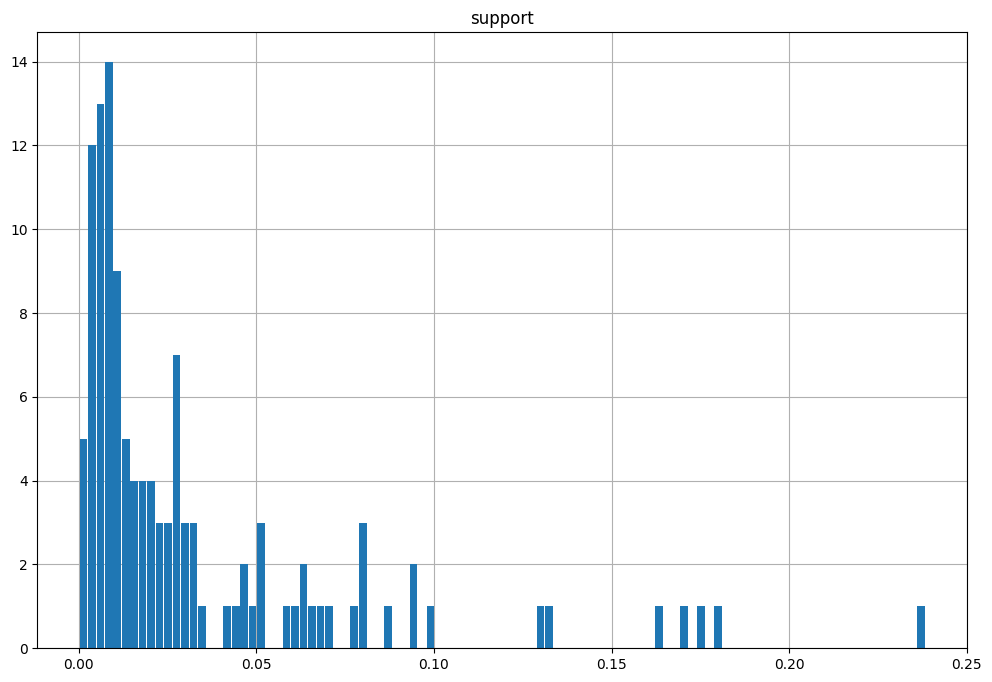

In [18]:
import matplotlib.pyplot as plt

support_df=pd.DataFrame(support,columns=["support"])
support_df.hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [19]:
support_df.describe()

,support
count,120.000000
mean,0.032616
std,0.042370
min,0.000133
25%,0.007566
50%,0.015665
75%,0.035929
max,0.238368


The histogram displays the distribution of support values, with the majority of items having support values in the range of 0 to 0.05. To get a clearer view of this distribution, let's zoom in on this range for a better perspective.

array([[<Axes: title={'center': 'support'}>]], dtype=object)

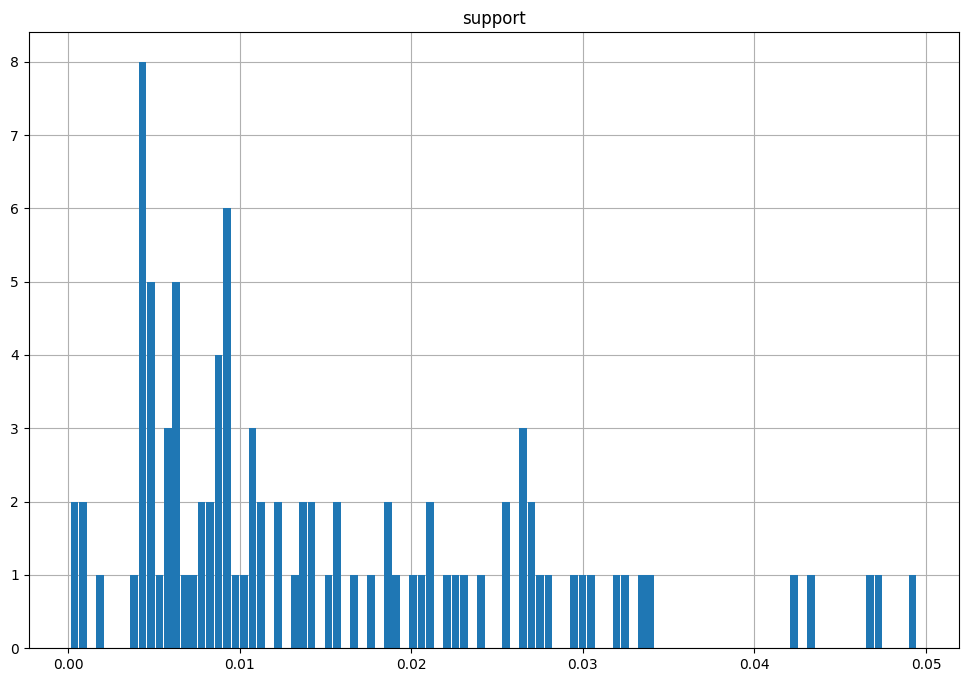

In [21]:
support_df[support_df["support"]<=0.05].hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
print(association_rules.__module__)

mlxtend.frequent_patterns.association_rules


In [24]:
import mlxtend
from mlxtend.frequent_patterns import association_rules

print(association_rules.__module__)  # Should output: mlxtend.frequent_patterns


mlxtend.frequent_patterns.association_rules


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

import seaborn as sns

# Generate frequent itemsets
frequent_itemsets1 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=2)
frequent_itemsets2 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=3)
# Get the number of itemsets
num_itemsets1 = len(frequent_itemsets1)
num_itemsets2 = len(frequent_itemsets2)

# Generate association rules
# Added the 'num_itemsets' argument, though it's likely deprecated
rules1 = association_rules(frequent_itemsets1, metric='support', min_threshold=0.0, num_itemsets=num_itemsets1)
rules2 = association_rules(frequent_itemsets2, metric='support', min_threshold=0.0, num_itemsets=num_itemsets2)

<Axes: xlabel='antecedent support', ylabel='consequent support'>

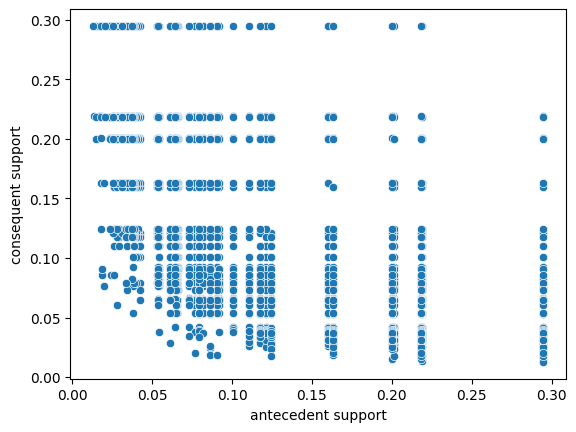

In [26]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules1)

<Axes: xlabel='antecedent support', ylabel='consequent support'>

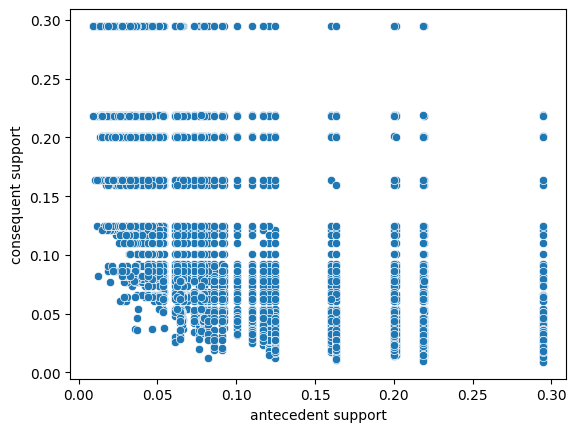

In [27]:
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules2)

We can observe that the values are mostly clustered below 0.15, with no antecedent or consequent support values exceeding 0.3. Therefore, any pruning we perform should focus on values within this range.

Since using just two metrics might not be enough to identify meaningful relationships, we can incorporate lift into the analysis. This raises the question: does lift tend to be high or low for certain antecedent and consequent support values? To explore this, we can adjust the size of the dots in the scatterplot according to their lift values. The scatterplot function allows us to do this using the size parameter.



<Axes: xlabel='antecedent support', ylabel='consequent support'>

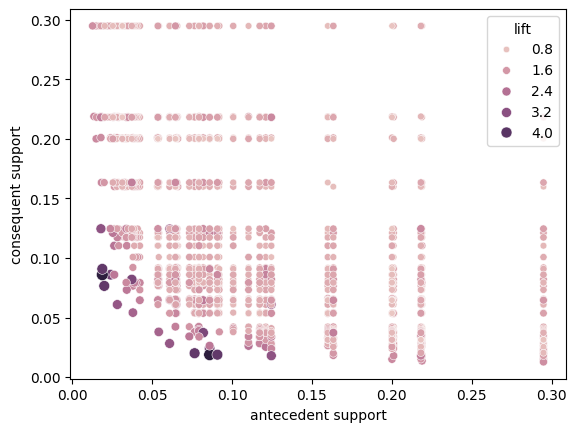

In [28]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules1,hue="lift")

<Axes: xlabel='antecedent support', ylabel='consequent support'>

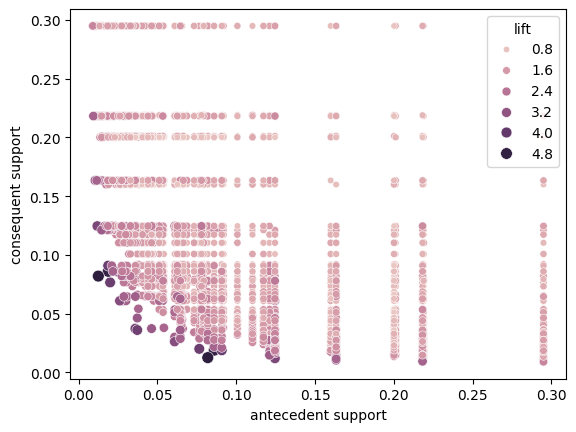

In [29]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules2,hue="lift")

We’ve re-drawn the same plot, but now we associate higher lift values with larger dots. Given the large number of data points, we’ve added a third variable using hue to represent the size of the lift. The larger the lift value, the darker and bigger the dot appears. From this visualization, we can immediately see that the largest dots are concentrated around very low antecedent and consequent support values. These results could be driven by a small number of transactions, suggesting that high lift values might not be as reliable or informative as expected. In fact, this plot encourages us to approach very high lift values with caution.



<Axes: xlabel='support', ylabel='confidence'>

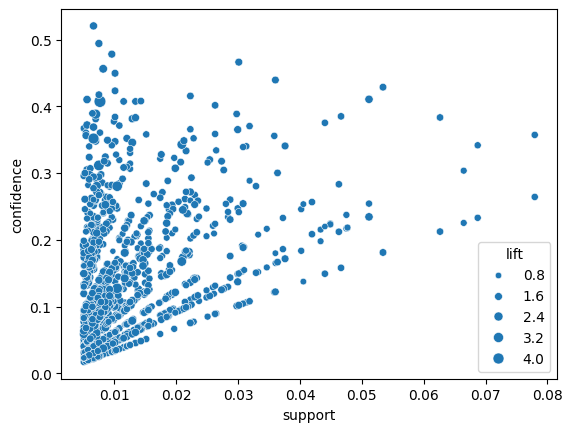

In [30]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1)

<Axes: xlabel='support', ylabel='confidence'>

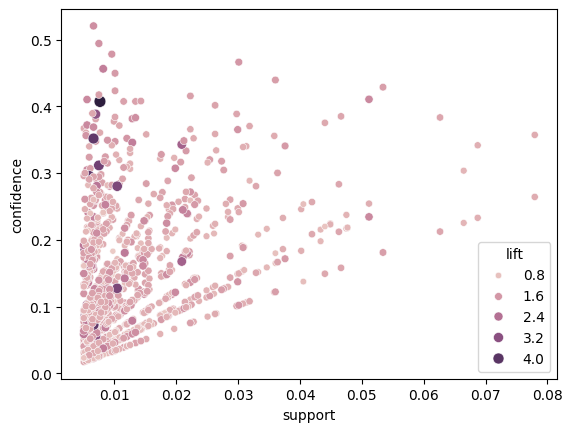

In [31]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1,hue="lift")

# **Apriori** **Implementation**

In [32]:
# Compute freqent itemsets
frequent_itemsets = apriori(onehot,
                            min_support=0.005, max_len=3,
                            use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets["itemsets"].apply(lambda x:len(x))
# Print number of itemsets
print(len(frequent_itemsets))
print(frequent_itemsets)

1040
       support                          itemsets  length
0     0.294936                   (mineral water)       1
1     0.218897                            (eggs)       1
2     0.218201                       (spaghetti)       1
3     0.201148                       (chocolate)       1
4     0.200104                    (french fries)       1
...        ...                               ...     ...
1035  0.005046              (burgers, champagne)       2
1036  0.005046               (hot dogs, burgers)       2
1037  0.005046       (butter, frozen vegetables)       2
1038  0.005046  (ground beef, salmon, spaghetti)       3
1039  0.005046    (ground beef, spaghetti, soup)       3

[1040 rows x 3 columns]


In applying the Apriori algorithm, frequently purchased items are identified by their support value. We define frequently purchased items as those bought in at least 0.5% of all transactions, which corresponds to a support value of 0.005. This results in 733 transactions being considered as frequently bought items. The top three most frequently bought items are mineral water, eggs, and spaghetti.

While we now have an understanding of the frequently bought items, the analysis continues by looking for associations between items to uncover patterns of which items are often sold together. Since the potential set of rules can be large, we apply multi-metric filtering in addition to the Apriori algorithm to narrow down and identify the most frequent itemsets.

Lift provides a straightforward and intuitive interpretation, where values greater than 1 indicate that the items occur together more often than would be expected if they were independently distributed across transactions.

For the analysis, we select lift as our primary metric with a minimum threshold of 3, followed by other metrics to prune the itemsets.

In [33]:
num_itemsets3 = len(frequent_itemsets)
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=3, num_itemsets=num_itemsets3)

In [34]:
print(display(rules1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(olive oil),(whole wheat pasta),0.081956,0.037237,0.010440,0.127389,3.421037,1.0,0.007388,1.103313,0.770868,0.096000,0.093639,0.203881
1,(whole wheat pasta),(olive oil),0.037237,0.081956,0.010440,0.280374,3.421037,1.0,0.007388,1.275724,0.735062,0.096000,0.216131,0.203881
2,"(mineral water, herb & pepper)",(ground beef),0.022272,0.124587,0.008700,0.390625,3.135366,1.0,0.005925,1.436576,0.696572,0.062972,0.303900,0.230229
3,(ground beef),"(mineral water, herb & pepper)",0.124587,0.022272,0.008700,0.069832,3.135366,1.0,0.005925,1.051130,0.777984,0.062972,0.048643,0.230229
4,"(herb & pepper, spaghetti)",(ground beef),0.021228,0.124587,0.008352,0.393443,3.157982,1.0,0.005707,1.443249,0.698163,0.060759,0.307119,0.230241
5,(ground beef),"(herb & pepper, spaghetti)",0.124587,0.021228,0.008352,0.067039,3.157982,1.0,0.005707,1.049102,0.780594,0.060759,0.046804,0.230241
6,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,1.0,0.006041,1.542446,0.804124,0.078853,0.351679,0.248238
7,(escalope),(pasta),0.085958,0.018792,0.007656,0.089069,4.739616,1.0,0.006041,1.077148,0.863212,0.078853,0.071622,0.248238
8,(mushroom cream sauce),(escalope),0.024013,0.085958,0.007482,0.311594,3.624963,1.0,0.005418,1.327766,0.741951,0.073005,0.246855,0.199319
9,(escalope),(mushroom cream sauce),0.085958,0.024013,0.007482,0.087045,3.624963,1.0,0.005418,1.069042,0.792234,0.073005,0.064583,0.199319


None


In [35]:
filtered_rules = rules1[(rules1['antecedent support']>0.005) &
                       (rules1['consequent support']>0.005) &
                       (rules1['confidence']>0.4) &
                       (rules1['support']>0.005) &
                       (rules1['conviction']>1)
                      ].sort_values('lift',ascending=False).reset_index(drop=True)
print(display(filtered_rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(mineral water, whole wheat pasta)",(olive oil),0.012528,0.081956,0.005046,0.402778,4.914573,1.0,0.004019,1.537190,0.806629,0.056420,0.349462,0.232174
1,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,1.0,0.006041,1.542446,0.804124,0.078853,0.351679,0.248238
2,"(chocolate, herb & pepper)",(ground beef),0.011832,0.124587,0.005220,0.441176,3.541119,1.0,0.003746,1.566529,0.726196,0.039788,0.361646,0.241538
3,"(frozen vegetables, soup)",(milk),0.010440,0.163390,0.005220,0.500000,3.060170,1.0,0.003514,1.673221,0.680324,0.030960,0.402350,0.265974


None


The Apriori algorithm, combined with advanced filtering, helps identify potentially valuable and interesting rules. By examining the antecedents and consequents columns, you can see the names of products involved in the rules. Each rule indicates that the antecedent is frequently sold alongside the consequent. This information can be used to create a cross-sell recommendation system, promoting these products together on your website or in-store during sales interactions.

Without deeper knowledge of the business behind this data, there isn't much more we can do. However, if you were working with your own data, you could explore the rules with higher confidence or lift values to better understand which items are commonly sold together. This insight would help you create strategies to promote those items or even explore other product combinations if you are looking to boost sales in different areas of your business.

**Conclusion**


For optimal item placement, it would be beneficial for the grocery store to position Whole wheat pasta, mineral water, and olive oil in close proximity to one another, either on the same shelf or near each other. This arrangement would make it more convenient for customers to access these products.

Additionally, we could consider offering these items as a bundled package or special offer at a lower price, encouraging customers to purchase all three together, which would boost sales and increase profit. Promotions could also be implemented, such as:

Offering a discount on olive oil when customers buy pasta and mineral water.
Offering a discount on escalope when customers purchase pasta.
Offering a discount on ground beef when customers buy chocolate and herb & pepper.
Offering a discount on milk when customers buy frozen vegetables and soup.
The store could advertise these special deals on certain days to encourage customers to purchase these item combinations to take advantage of the discounts.

**Future Work**


Zhang's metric could be incorporated into the pruning process, as it provides a more comprehensive understanding of both the associations and disassociations between items.
We could aggregate the original transaction data by categorizing items, which would help reduce the sparsity of items. For instance, in our case, items like parmesan cheese, strong cheese, cottage cheese, and grated cheese could be grouped under a broader "cheese" category.
Click to add a cell.